In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime
import matplotlib.dates as mdates

full_data = pd.read_csv('all_breakdown.csv')
full_data['SOLAR'] = full_data['SOLAR'].fillna(0)
full_data['SOLAR PV'] = full_data['SOLAR PV'].fillna(0)
full_data['SOLAR THERMAL'] = full_data['SOLAR THERMAL'].fillna(0)
full_data['SOLAR TOTAL'] = full_data['SOLAR']+full_data['SOLAR PV']+full_data['SOLAR THERMAL']
full_data['TIMESTAMP'] = pd.to_datetime(full_data['TIMESTAMP'])
full_data['TIMESTAMP'] = pd.to_datetime(full_data['TIMESTAMP'])
full_data['MONTH'] = full_data['TIMESTAMP'].dt.month
full_data['YEAR'] = full_data['TIMESTAMP'].dt.year
full_data['DAY'] = full_data['TIMESTAMP'].dt.day
full_data['WIND SOLAR'] = full_data['SOLAR TOTAL'] + full_data['WIND TOTAL']
full_data['RENEW TOTAL'] = full_data['BIOGAS'] + full_data['BIOMASS']+ full_data['GEOTHERMAL']+full_data['GEOTHERMAL']+full_data['WIND SOLAR']
full_data['Hour'] = full_data['Hour'].astype(int)
full_data['COMBINED SMALLER SOURCES'] = full_data['RENEW TOTAL'] - full_data['WIND SOLAR']
#full_data['RENEW TOTAL'] = full_data['RENEW TOTAL'].apply(lambda x : "{:,}".format(x))


YearMonthGrouped = full_data.groupby(['YEAR','MONTH'])
monthly_sum = pd.DataFrame(YearMonthGrouped['RENEW TOTAL'].sum())
monthly_sum['Renew Total'] = monthly_sum['RENEW TOTAL']
monthly_sum.drop(columns=['RENEW TOTAL'], inplace=True)
monthly_sum['Solar Total'] = YearMonthGrouped['SOLAR TOTAL'].sum()
monthly_sum['Wind Total'] = YearMonthGrouped['WIND TOTAL'].sum()
monthly_sum['Wind Solar Total'] = YearMonthGrouped['WIND SOLAR'].sum()

hour_grouped = full_data.groupby('Hour')
hour_sum = pd.DataFrame(hour_grouped['SOLAR'].mean())
#hour_sum['Solar'] = hour_sum['SOLAR']
hour_sum.drop(columns=['SOLAR'], inplace=True)
hour_sum['Wind Total'] = hour_grouped['WIND TOTAL'].mean()
hour_sum['Biogas'] = hour_grouped['BIOGAS'].mean()
hour_sum['Geothermal'] = hour_grouped['GEOTHERMAL'].mean()
hour_sum['Solar PV'] = hour_grouped['SOLAR PV'].mean()
hour_sum['Solar Total'] = hour_grouped['SOLAR TOTAL'].mean()
hour_sum['Solar Thermal'] = hour_grouped['SOLAR THERMAL'].mean()
hour_sum['Small Hydro'] = hour_grouped['SMALL HYDRO'].mean()
hour_sum['Biomass'] = hour_grouped['BIOMASS'].mean()
hour_sum['Renew Total'] = hour_grouped['RENEW TOTAL'].mean()
hour_sum['Combined Smaller Sources'] = hour_grouped['COMBINED SMALLER SOURCES'].mean()

display(full_data.head())
display(monthly_sum.head())
display(hour_sum.head())
print(full_data.info())

TIMESTAMP  BIOGAS  BIOMASS  GEOTHERMAL  Hour  SMALL HYDRO  SOLAR  \
0 2011-07-21 00:00:00   177.0    372.0       984.0     1        516.0    0.0   
1 2011-07-21 01:00:00   176.0    373.0       984.0     2        509.0    0.0   
2 2011-07-21 02:00:00   177.0    371.0       985.0     3        506.0    0.0   
3 2011-07-21 03:00:00   177.0    374.0       985.0     4        504.0    0.0   
4 2011-07-21 04:00:00   177.0    377.0       984.0     5        508.0    0.0   

   SOLAR PV  SOLAR THERMAL  WIND TOTAL  SOLAR TOTAL  MONTH  YEAR  DAY  \
0       0.0            0.0      1607.0          0.0      7  2011   21   
1       0.0            0.0      1619.0          0.0      7  2011   21   
2       0.0            0.0      1660.0          0.0      7  2011   21   
3       0.0            0.0      1633.0          0.0      7  2011   21   
4       0.0            0.0      1520.0          0.0      7  2011   21   

   WIND SOLAR  RENEW TOTAL  COMBINED SMALLER SOURCES  
0      1607.0       4124.0                    2517.0  
1      1619.0       4136.0                    2517.0  
2      1660.0       4178.0                    2518.0  
3      1633.0       4154.0                    2521.0  
4      1520.0       4042.0                    2522.0

Renew Total  Solar Total  Wind Total  Wind Solar Total
YEAR MONTH                                                        
2010 4         911869.0      27307.0    208245.0          235552.0
     5        2610401.0     101640.0    665327.0          766967.0
     6        2806834.0     131065.0    805400.0          936465.0
     7        2912108.0     130052.0    842461.0          972513.0
     8        2665302.0     118890.0    680201.0          799091.0

Wind Total      Biogas  Geothermal  Solar PV  Solar Total  \
Hour                                                               
1     1521.266220  179.651798  963.327744  0.029119     0.350497   
2     1530.472853  179.699850  962.971254  0.029119     0.282315   
3     1478.404808  179.891453  962.771047  0.025213     0.204190   
4     1409.330734  180.122185  962.975865  0.021307     0.167259   
5     1338.311521  180.040767  962.791031  0.406250     0.535156   

      Solar Thermal  Small Hydro     Biomass  Renew Total  \
Hour                                                        
1          0.055043   283.995980  298.051838  3925.975842   
2          0.051136   274.658983  296.817526  3933.215053   
3          0.013849   267.809934  297.830169  3881.872713   
4          0.006037   266.499948  299.219628  3814.791535   
5          0.008168   271.807781  300.312655  3744.782162   

      Combined Smaller Sources  
Hour                            
1                  2404.359125  
2                  2402.459885  
3                  2403.263715  
4                  2405.293543  
5                  2405.935484

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67584 entries, 0 to 67583
Data columns (total 17 columns):
TIMESTAMP                   67584 non-null datetime64[ns]
BIOGAS                      67584 non-null float64
BIOMASS                     67584 non-null float64
GEOTHERMAL                  67584 non-null float64
Hour                        67584 non-null int32
SMALL HYDRO                 67584 non-null float64
SOLAR                       67584 non-null float64
SOLAR PV                    67584 non-null float64
SOLAR THERMAL               67584 non-null float64
WIND TOTAL                  67584 non-null float64
SOLAR TOTAL                 67584 non-null float64
MONTH                       67584 non-null int64
YEAR                        67584 non-null int64
DAY                         67584 non-null int64
WIND SOLAR                  67584 non-null float64
RENEW TOTAL                 67584 non-null float64
COMBINED SMALLER SOURCES    67584 non-null float64
dtypes: datetime64[ns](1)

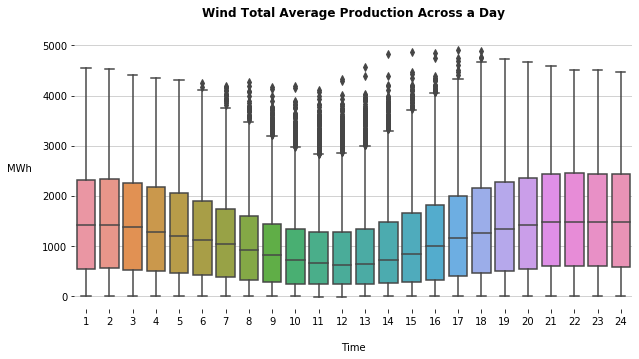

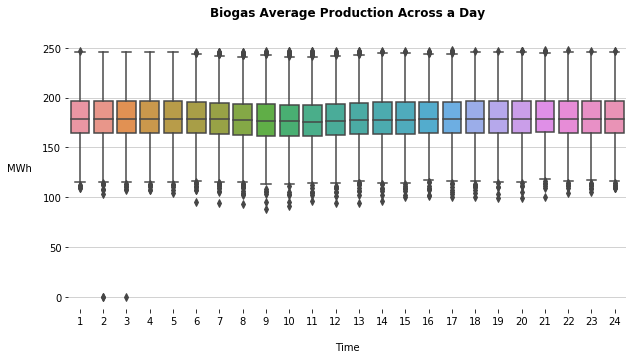

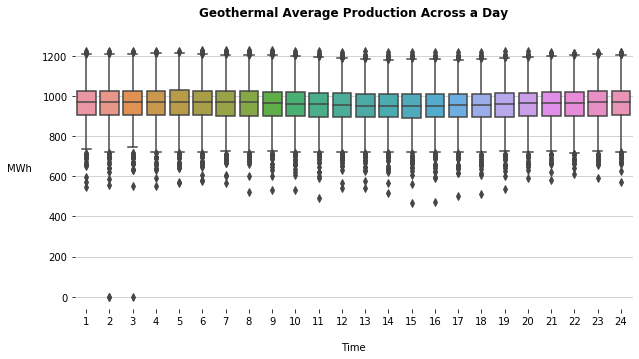

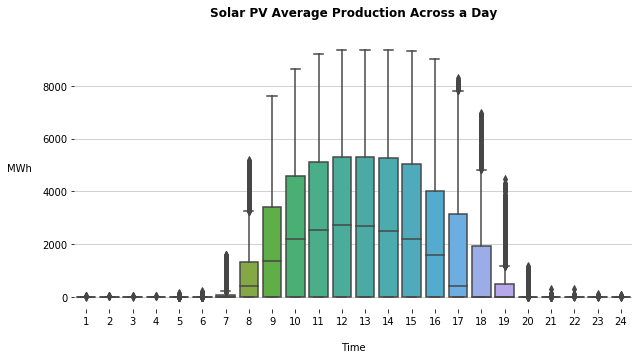

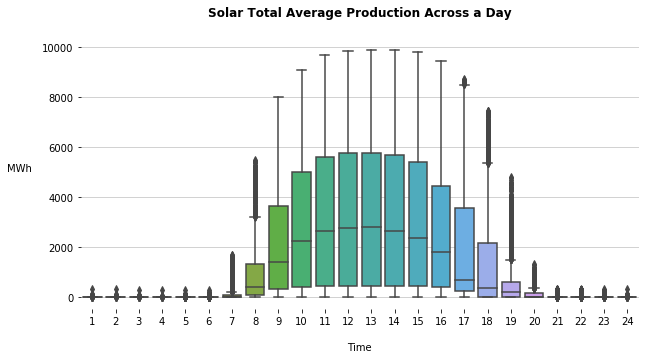

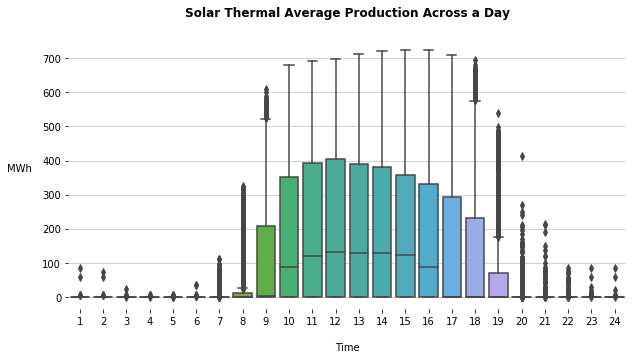

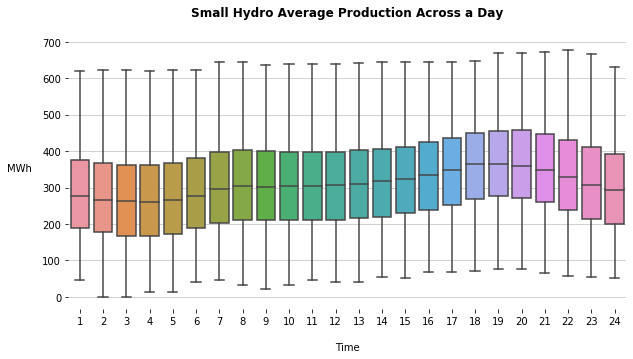

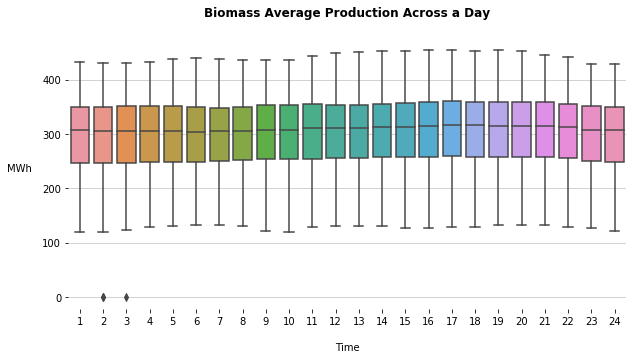

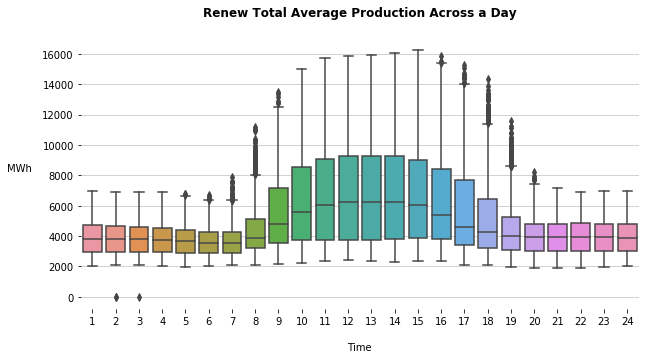

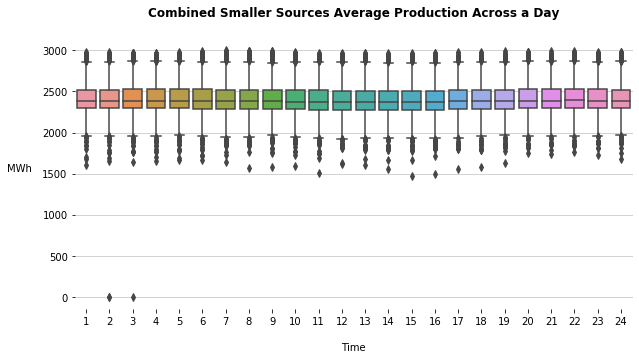

In [66]:
for i in range(len(hour_sum.columns)):
    y = np.array(hour_sum.loc[:,hour_sum.columns[i]])
    x = np.array(hour_sum.reset_index().loc[:,'Hour'])
    x = map(lambda x : int(x),x)
    plt.figure(figsize=(10,5))
    sns.boxplot(full_data['Hour'],full_data[hour_sum.columns[i].upper()])
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().set_axisbelow(True)
    plt.gca().grid(axis='y',alpha=.7)

    plt.title('{} Average Production Across a Day\n'.format(hour_sum.columns[i]),fontweight='bold')

    plt.xlabel('\nTime')

    plt.ylabel("MWh  ",rotation='0',ha='right')
    plt.savefig('Images/Box Plots Daily Production/{}_average_daily_production.png'.format(hour_sum.columns[i]),bbox_inches = "tight")

plt.show()

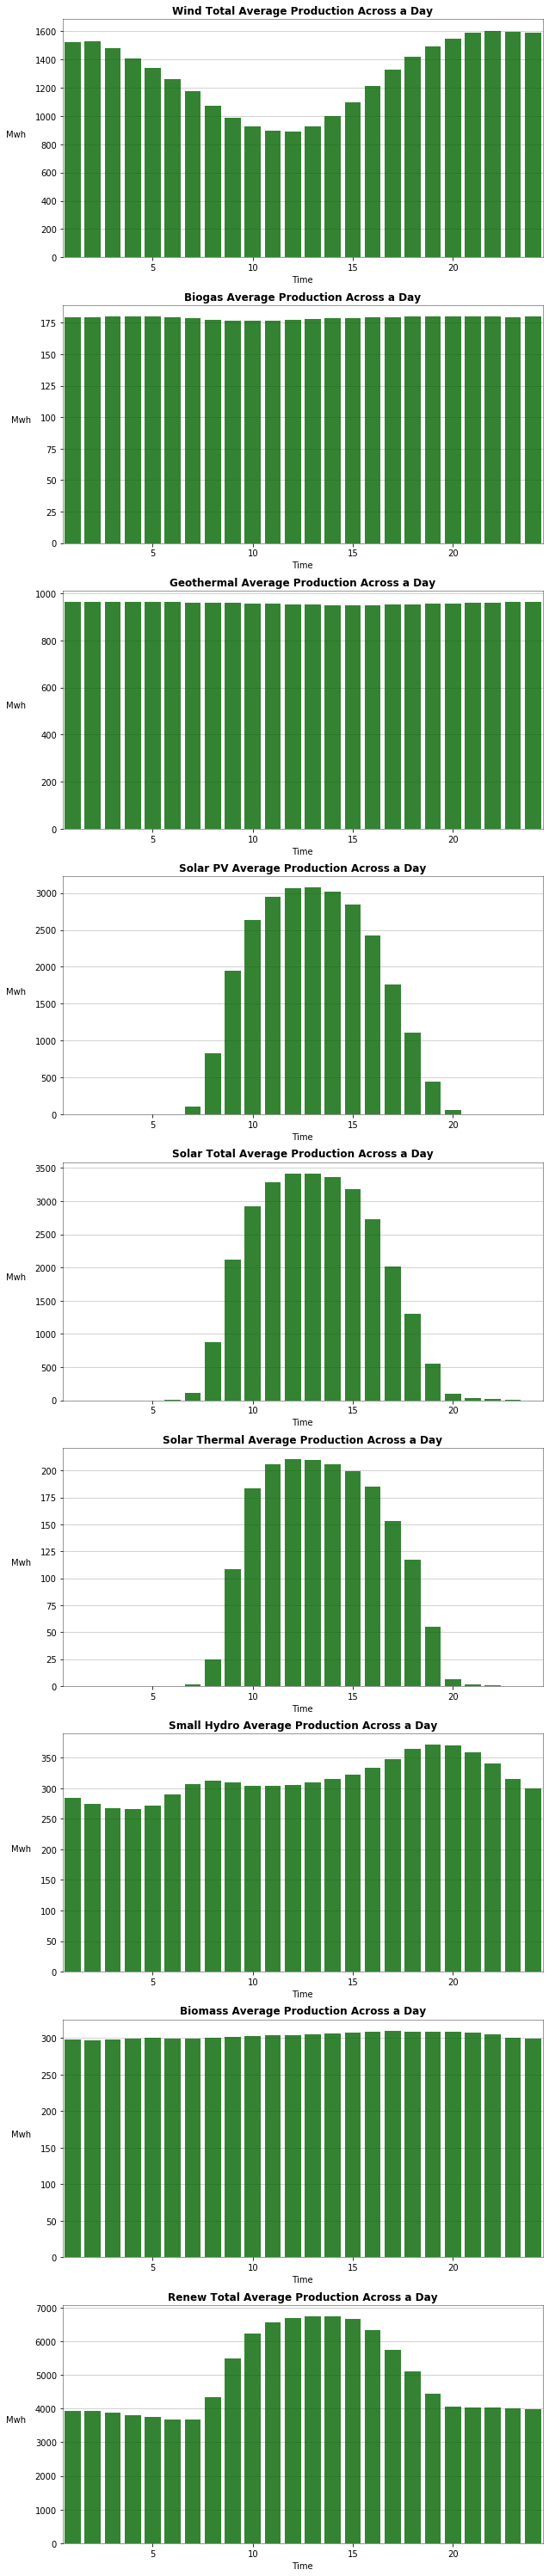

In [3]:

num_rows = len(hour_sum.columns)
plt.figure(figsize=(10,num_rows*6))
for i in range(len(hour_sum.columns)):
    y = np.array(hour_sum.loc[:,hour_sum.columns[i]])
    x = np.array(hour_sum.reset_index().loc[:,'Hour'])
    plt.subplot(num_rows,1,i+1)
    plt.bar(x,y,color='#006400',alpha=.8)
    plt.ylabel('')
    plt.title('{} Average Production Across a Day'.format(hour_sum.columns[i]),fontweight='bold')
    plt.gca().spines['top'].set_alpha(0.5)
    plt.gca().spines['left'].set_alpha(0.5)
    plt.gca().spines['right'].set_alpha(0.5)
    plt.gca().spines['bottom'].set_alpha(0.5)
    plt.gca().set_axisbelow(True)
    plt.gca().grid(axis='y',alpha=.7)
    plt.xlabel('Time')
    plt.xlim(.5,24.5)
    plt.ylabel("Mwh  ",rotation='0',ha='right')

plt.show()

#plot = sns.lineplot(solar_hour['Hour'],solar_hour['SOLAR'])
#plt.show()

#plot = sns.barplot(x='Hour',y='SOLAR',data=solar_hour)
#plt.xticks(rotation=50)
#plt.show()

#plot = sns.barplot(x='Hour',y='WIND TOTAL',data=solar_hour)
#plt.xticks(rotation=50)
#plt.show()

#plot = sns.barplot(x='Hour',y='BIOGAS',data=solar_hour)
#plt.xticks(rotation=50)
#plt.show()

#plot = sns.barplot(x='Hour',y='GEOTHERMAL',data=solar_hour)
#plt.xticks(rotation=50)
#plt.show()

#plot = sns.barplot(x='Hour',y='SOLAR PV',data=solar_hour)
#plt.xticks(rotation=50)
#plt.show()

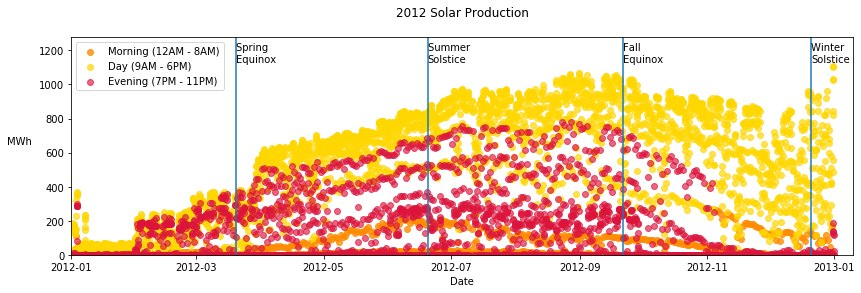

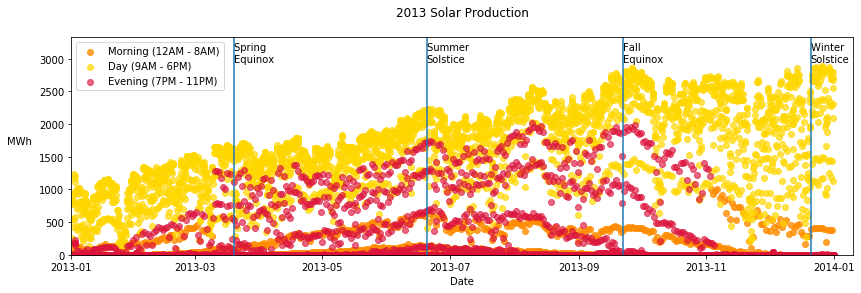

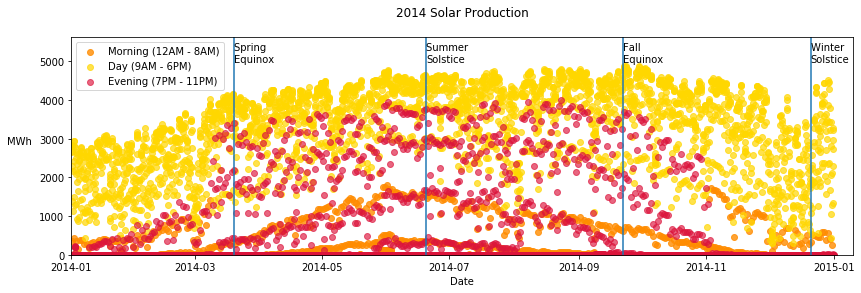

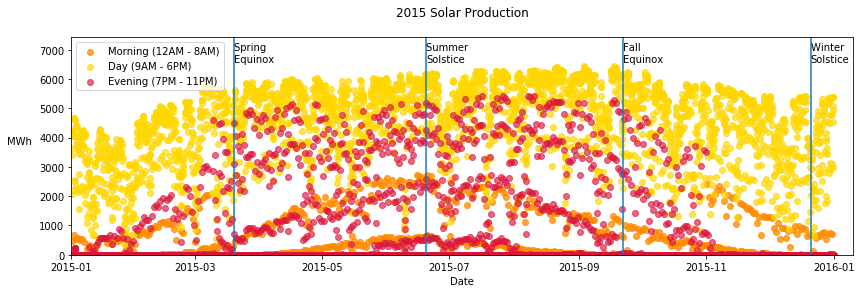

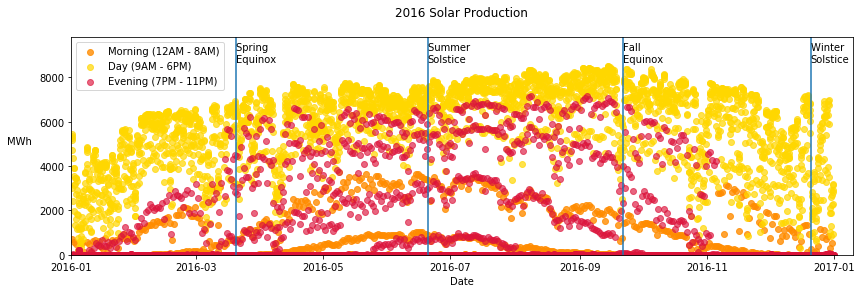

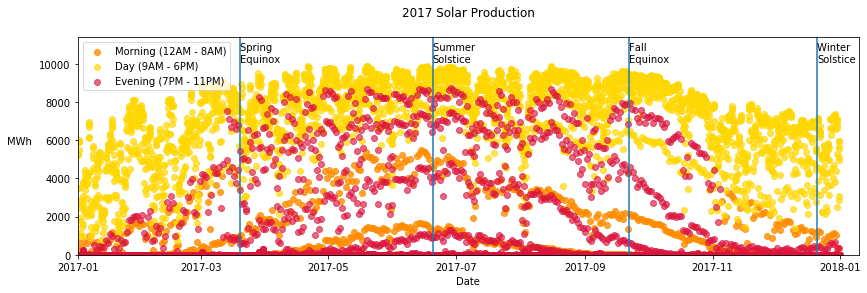

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

for year in range(2012,2018):
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_morning = ((hour < 9))
    mask_day = ((hour >= 9)&(hour <= 16))
    mask_evening = ((hour >16))
    #mask_night = ((hour < 6)|(hour >20))
    #mask_evening = ((hour > 15)&(hour < 21))
    #ask_morning = ((hour >5)&(hour<11))
    #mask_mid = ((hour >10)&(hour<16))
    x = data['TIMESTAMP']
    y = data['SOLAR TOTAL']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='#FF8C00',alpha=.8,label='Morning (12AM - 8AM)')
    plt.scatter(x[mask_day], y[mask_day],c='#FFD700',alpha=.7,label='Day (9AM - 6PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='#DC143C',alpha=.65,label='Evening (7PM - 11PM)')
    #plt.xlim(pd.to_datetime('01/01/12'),pd.to_datetime('12/31/12'))
    plt.ylim(0,y.max()*1.15)
    plt.xlim(pd.to_datetime('01/01/{}'.format(year)),pd.to_datetime('01/10/{}'.format(year+1)))
    plt.ylabel('MWh ',rotation='0',ha='right')
    plt.xlabel('Date')
    plt.title('{} Solar Production\n'.format(year))
    plt.legend(loc='upper left')
    seasons = [(pd.to_datetime('June 20, {}'.format(year)), 'Summer \nSolstice'),
           (pd.to_datetime('December 21, {}'.format(year)), 'Winter \nSolstice'),
           (pd.to_datetime('September 22, {}'.format(year)), 'Fall \nEquinox'),
           (pd.to_datetime('March 20, {}'.format(year)), 'Spring \nEquinox')]
    for date,season in seasons:
        plt.axvline(date)
        plt.text(date,y.max()*1.02,season)
    plt.savefig('Images/Seasons/{}_solar_production_seasons.png'.format(year))
    plt.show()

<Figure size 1008x288 with 0 Axes>

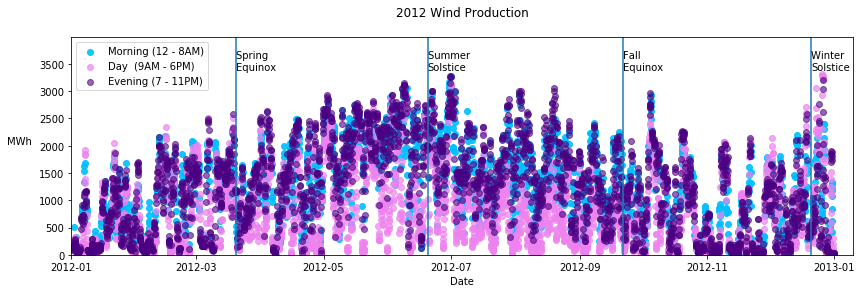

<Figure size 1008x288 with 0 Axes>

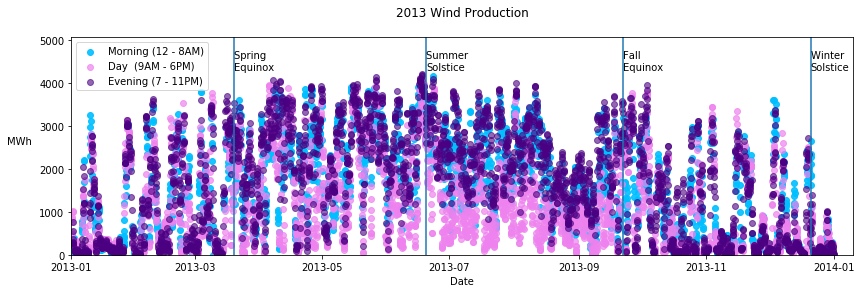

<Figure size 1008x288 with 0 Axes>

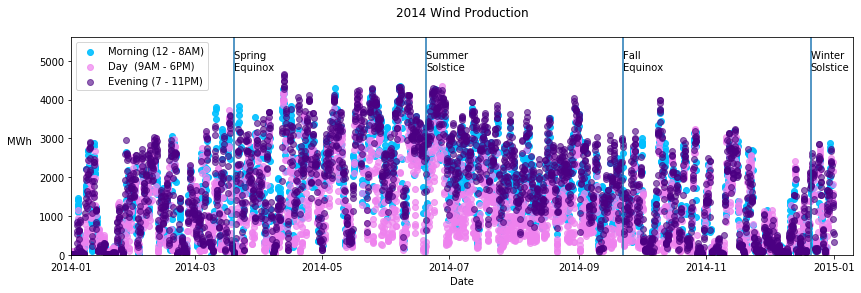

<Figure size 1008x288 with 0 Axes>

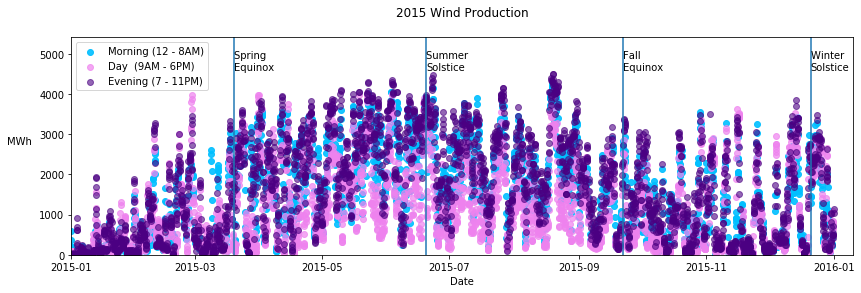

<Figure size 1008x288 with 0 Axes>

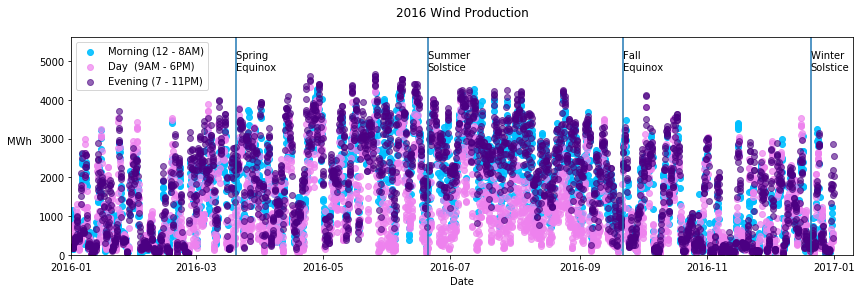

<Figure size 1008x288 with 0 Axes>

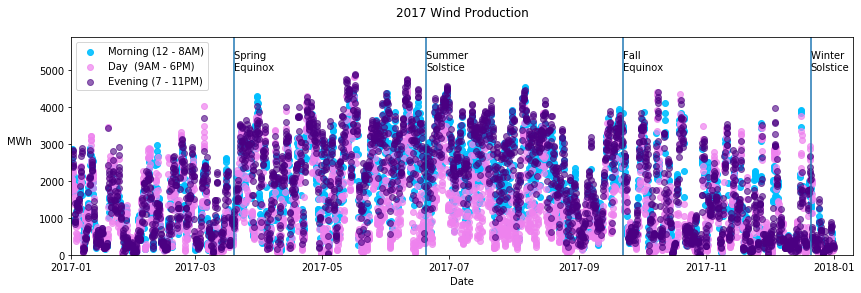

In [63]:
for year in range(2012,2018):
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_morning = ((hour < 9))
    mask_day = ((hour >= 9)&(hour <= 16))
    mask_evening = ((hour >16))
    mask_mid = ((hour >10)&(hour<16))
    masks = [mask_morning, mask_mid, mask_evening]
    plt.figure(figsize=(14,4))
    x = data['TIMESTAMP']
    y = data['WIND TOTAL']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='#00BFFF',alpha=.9,label='Morning (12 - 8AM)')
    plt.scatter(x[mask_day], y[mask_day],c='#EE82EE',alpha=.7,label='Day  (9AM - 6PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='#4B0082',alpha=.6,label='Evening (7 - 11PM)') 
   # plt.scatter(x[mask_night], y[mask_night],c='#4B0082',alpha=.65,label='Night')
    #plt.xlim(pd.to_datetime('01/01/12'),pd.to_datetime('12/31/12'))
    plt.xlim(pd.to_datetime('01/01/{}'.format(year)),pd.to_datetime('01/10/{}'.format(year+1)))
    plt.ylim(0,y.max()*1.2)
    plt.ylabel('MWh ',rotation='0',ha='right')
    plt.xlabel('Date')
    plt.title('{} Wind Production\n'.format(year))
    plt.legend(loc='upper left')
    seasons = [(pd.to_datetime('June 20, {}'.format(year)), 'Summer \nSolstice'),
           (pd.to_datetime('December 21, {}'.format(year)), 'Winter \nSolstice'),
           (pd.to_datetime('September 22, {}'.format(year)), 'Fall \nEquinox'),
           (pd.to_datetime('March 20, {}'.format(year)), 'Spring \nEquinox')]
    for date,season in seasons:
        plt.axvline(date)
        plt.text(date,y.max()*1.02,season)
    if year in [2012,2017]:
        plt.savefig('Images/Seasons/{}_wind_production_seasons.png'.format(year))
    plt.show()

<Figure size 1008x288 with 0 Axes>

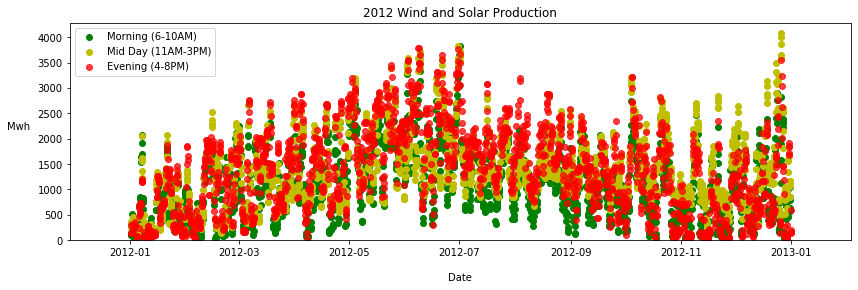

<Figure size 1008x288 with 0 Axes>

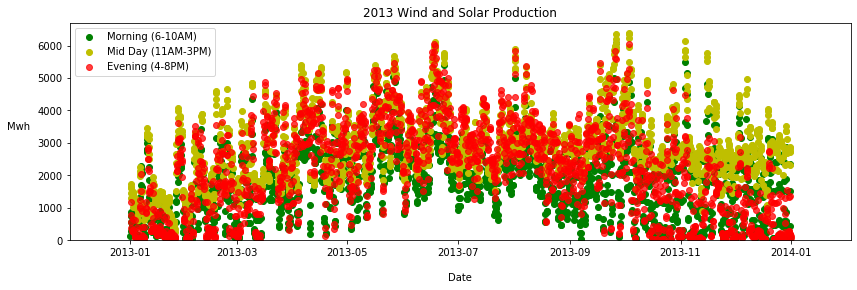

<Figure size 1008x288 with 0 Axes>

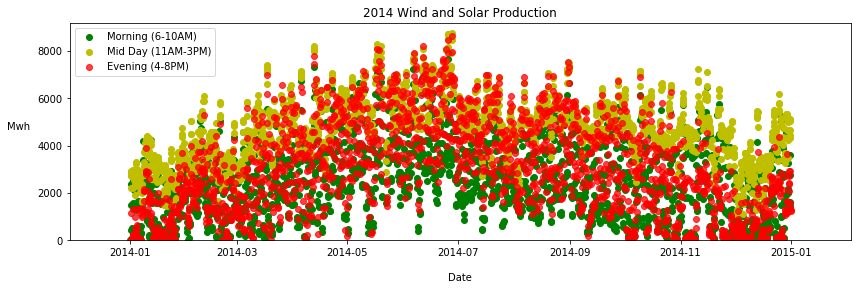

<Figure size 1008x288 with 0 Axes>

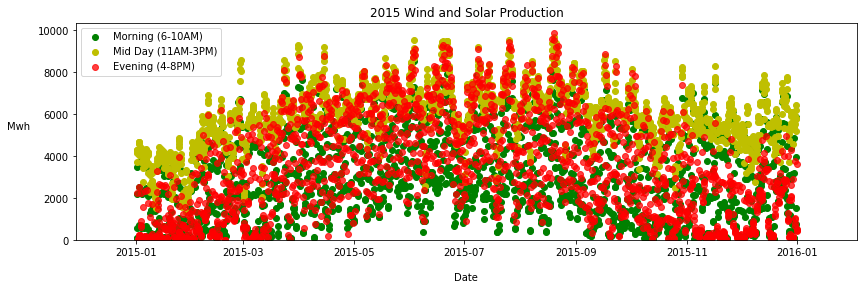

<Figure size 1008x288 with 0 Axes>

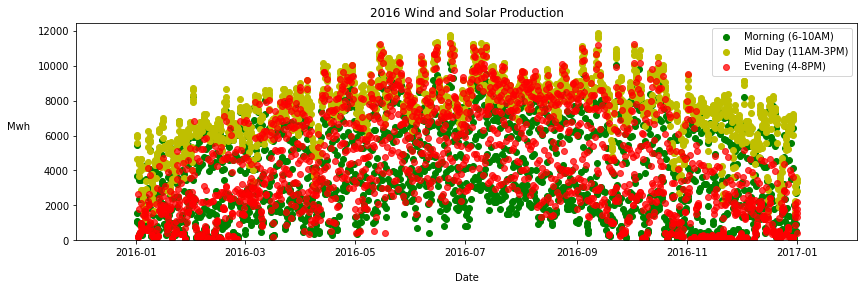

<Figure size 1008x288 with 0 Axes>

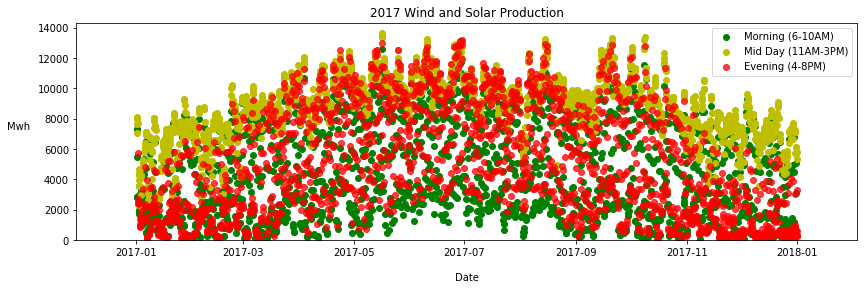

In [13]:
for year in range(2012,2018):
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_night = ((hour < 6)|(hour >20))
    mask_evening = ((hour > 15)&(hour < 21))
    mask_morning = ((hour >5)&(hour<11))
    mask_mid = ((hour >10)&(hour<16))
    masks = [mask_morning, mask_mid, mask_evening]
    plt.figure(figsize=(14,4))
    x = data['TIMESTAMP']
    y = data['WIND SOLAR']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='g',label='Morning (6-10AM)')
    plt.scatter(x[mask_mid], y[mask_mid],c='y',label='Day  (9AM - 6PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='r',alpha=.75,label='Evening (4-8PM)')
    #plt.xlim(pd.to_datetime('01/01/12'),pd.to_datetime('12/31/12'))
    plt.ylim(0,y.max()*1.05)
    plt.ylabel('Mwh ',rotation='0',ha='right')
    plt.xlabel('\nDate')
    plt.title('{} Wind and Solar Production'.format(year))
    plt.legend()
    plt.show()

<Figure size 1008x288 with 0 Axes>

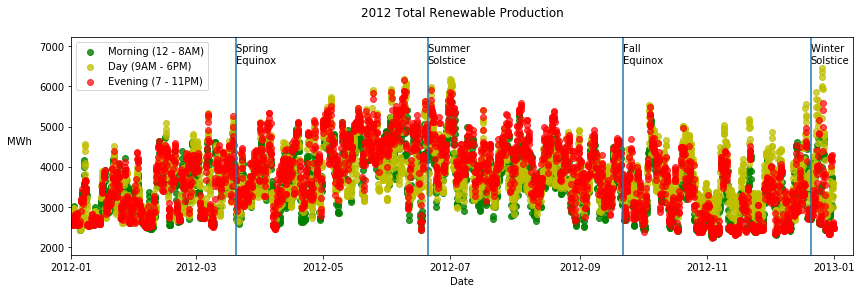

<Figure size 1008x288 with 0 Axes>

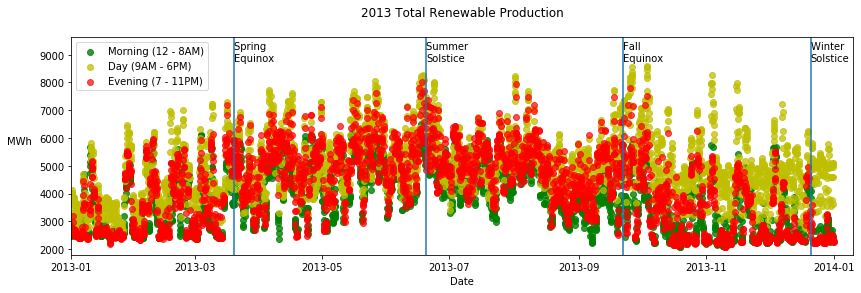

<Figure size 1008x288 with 0 Axes>

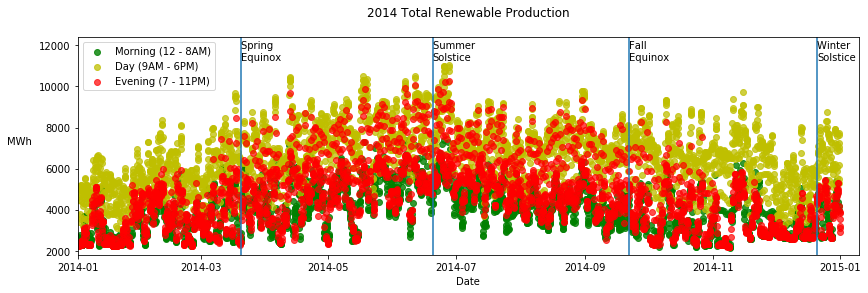

<Figure size 1008x288 with 0 Axes>

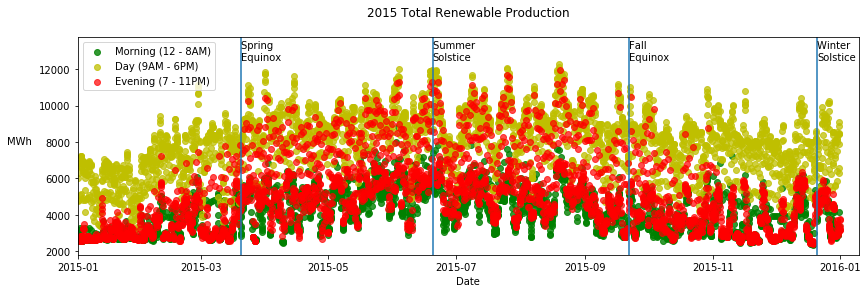

<Figure size 1008x288 with 0 Axes>

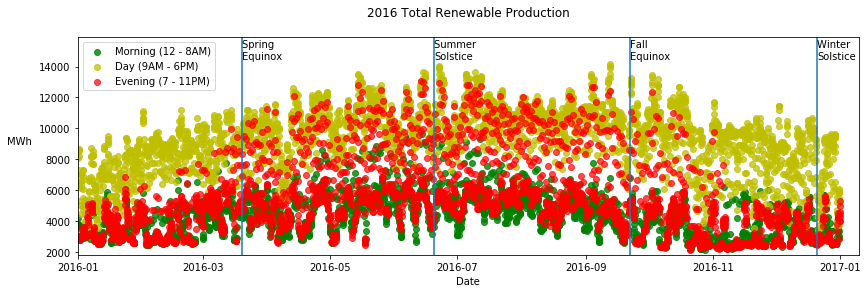

<Figure size 1008x288 with 0 Axes>

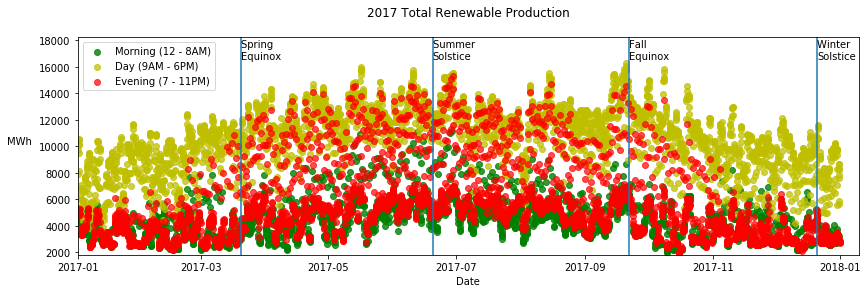

In [64]:
for year in range(2012,2018):
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_morning = ((hour < 9))
    mask_day = ((hour >= 9)&(hour <= 16))
    mask_evening = ((hour >16))
    mask_mid = ((hour >10)&(hour<16))
    plt.figure(figsize=(14,4))
    x = data['TIMESTAMP']
    y = data['RENEW TOTAL']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='g',alpha=.8,label='Morning (12 - 8AM)')
    plt.scatter(x[mask_day], y[mask_day],c='y',alpha=.75,label='Day (9AM - 6PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='r',alpha=.7,label='Evening (7 - 11PM)')
    #plt.xlim(pd.to_datetime('01/01/12'),pd.to_datetime('12/31/12'))
    plt.xlim(pd.to_datetime('01/01/{}'.format(year)),pd.to_datetime('01/10/{}'.format(year+1)))
    plt.ylim(1800,y.max()*1.12)
    plt.ylabel('MWh ',rotation='0',ha='right')
    plt.xlabel('Date')
    plt.title('{} Total Renewable Production\n'.format(year))
    plt.legend(loc='upper left')
    seasons = [(pd.to_datetime('June 20, {}'.format(year)), 'Summer \nSolstice'),
           (pd.to_datetime('December 21, {}'.format(year)), 'Winter \nSolstice'),
           (pd.to_datetime('September 22, {}'.format(year)), 'Fall \nEquinox'),
           (pd.to_datetime('March 20, {}'.format(year)), 'Spring \nEquinox')]
    for date,season in seasons:
        plt.axvline(date)
        plt.text(date,y.max()*1.02,season)
    plt.savefig('Images/Seasons/{}_total_renew_production_seasons.png'.format(year))
    plt.show()

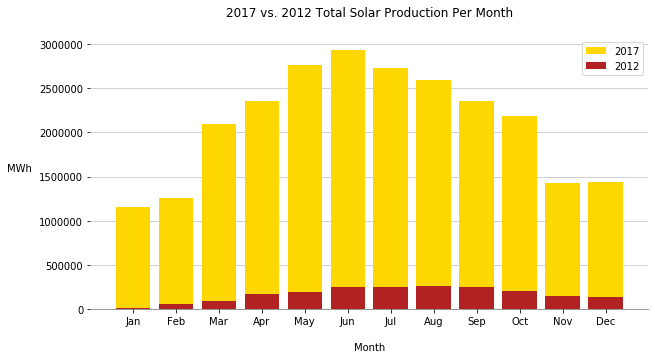

In [6]:
color = ['#FFD700','#B22222']
alpha = [1,1]
years = [2017,2012]


fig, ax = plt.subplots()

for i in range(len(years)):
    data = full_data.loc[full_data['YEAR']==years[i],:]
    grouped = data.groupby('MONTH')
    group_df = pd.DataFrame(grouped['SOLAR TOTAL'].sum()).reset_index()
    group_df['MONTH'] = group_df['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
    plt.bar(group_df['MONTH'],group_df['SOLAR TOTAL'],color=color[i],alpha=alpha[i],label=years[i])
fig.set_figheight(5)
fig.set_figwidth(10)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.set_axisbelow(True)
plt.grid(axis='y',alpha=.7)
plt.ylabel('MWh ',rotation='0',ha='right')
plt.xlabel('\nMonth')
plt.title('2017 vs. 2012 Total Solar Production Per Month\n')

plt.legend()
plt.savefig('Images/Montly_Yearly/2017vs2012_Solar_per_month.png'.format(year),bbox_inches='tight')
plt.show()

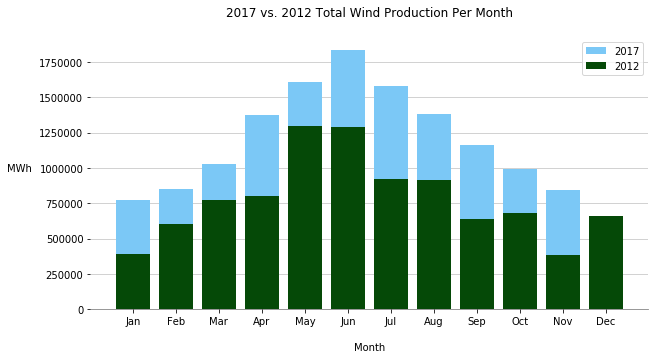

In [7]:
color = ['xkcd:lightblue','xkcd:darkgreen']
alpha = [1,1]
years = [2017,2012]


fig, ax = plt.subplots()

for i in range(len(years)):
    data = full_data.loc[full_data['YEAR']==years[i],:]
    grouped = data.groupby('MONTH')
    group_df = pd.DataFrame(grouped['WIND TOTAL'].sum()).reset_index()
    group_df['MONTH'] = group_df['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
    plt.bar(group_df['MONTH'],group_df['WIND TOTAL'],color=color[i],alpha=alpha[i],label=years[i])
fig.set_figheight(5)
fig.set_figwidth(10)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.set_axisbelow(True)
plt.grid(axis='y',alpha=.7)
plt.ylabel('MWh ',rotation='0',ha='right')
plt.xlabel('\nMonth')
plt.title('2017 vs. 2012 Total Wind Production Per Month\n')

plt.legend()
plt.savefig('Images/Montly_Yearly/2017vs2012_Wind_prod_per_month.png',bbox_inches='tight')
plt.show()

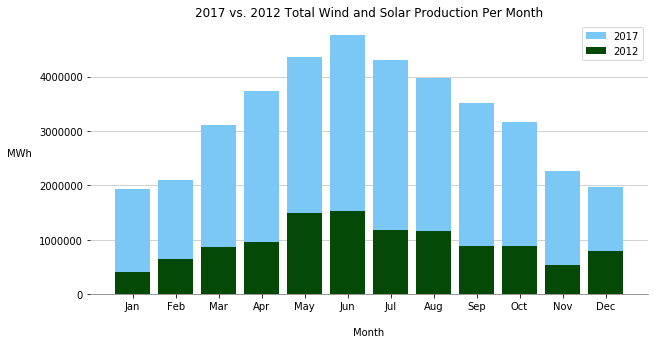

In [8]:
color = ['xkcd:lightblue','xkcd:darkgreen']
alpha = [1,1]
years = [2017,2012]


fig, ax = plt.subplots()

for i in range(len(years)):
    data = full_data.loc[full_data['YEAR']==years[i],:]
    grouped = data.groupby('MONTH')
    group_df = pd.DataFrame(grouped['WIND SOLAR'].sum()).reset_index()
    group_df['MONTH'] = group_df['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
    plt.bar(group_df['MONTH'],group_df['WIND SOLAR'],color=color[i],alpha=alpha[i],label=years[i])
fig.set_figheight(5)
fig.set_figwidth(10)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.set_axisbelow(True)
plt.grid(axis='y',alpha=.7)
plt.ylabel('MWh ',rotation='0',ha='right')
plt.xlabel('\nMonth')
plt.title('2017 vs. 2012 Total Wind and Solar Production Per Month')

plt.legend()
plt.savefig('Images/Montly_Yearly/2017vs2012_WindAndSolar_prod_per_month.png'.format(year),bbox_inches='tight')
plt.show()

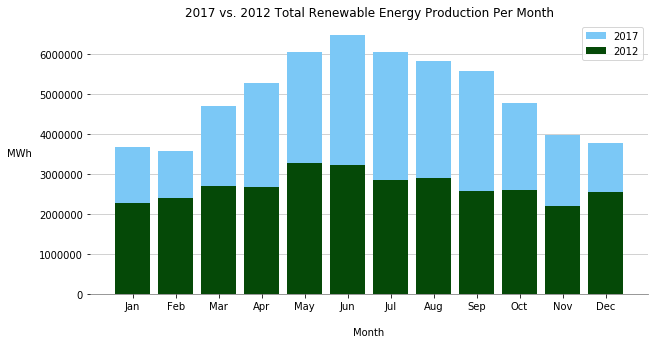

In [9]:
color = ['xkcd:lightblue','xkcd:darkgreen']
alpha = [1,1]
years = [2017,2012]


fig, ax = plt.subplots()

for i in range(len(years)):
    data = full_data.loc[full_data['YEAR']==years[i],:]
    grouped = data.groupby('MONTH')
    group_df = pd.DataFrame(grouped['RENEW TOTAL'].sum()).reset_index()
    group_df['MONTH'] = group_df['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
    plt.bar(group_df['MONTH'],group_df['RENEW TOTAL'],color=color[i],alpha=alpha[i],label=years[i])
fig.set_figheight(5)
fig.set_figwidth(10)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.set_axisbelow(True)
plt.grid(axis='y',alpha=.7)
plt.ylabel('MWh ',rotation='0',ha='right')
plt.xlabel('\nMonth')
plt.title('2017 vs. 2012 Total Renewable Energy Production Per Month')

legend = plt.legend()
plt.setp(legend.get_texts(), color='k')
plt.savefig('Images/Montly_Yearly/2017vs2012_TotalRenewable_prod_per_month.png',bbox_inches='tight')
plt.show()

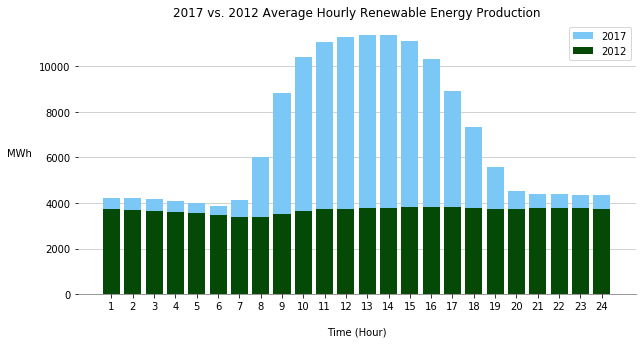

In [10]:
color = ['xkcd:lightblue','xkcd:darkgreen']
alpha = [1,1]
years = [2017,2012]


fig, ax = plt.subplots()

for i in range(len(years)):
    data = full_data.loc[full_data['YEAR']==years[i],:]
    grouped = data.groupby('Hour')
    group_df = pd.DataFrame(grouped['RENEW TOTAL'].mean()).reset_index()
    plt.bar(group_df['Hour'],group_df['RENEW TOTAL'],color=color[i],alpha=alpha[i],label=years[i])
fig.set_figheight(5)
fig.set_figwidth(10)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.set_axisbelow(True)
plt.grid(axis='y',alpha=.7)
plt.ylabel('MWh ',rotation='0',ha='right')
plt.xlabel('\nTime (Hour)')
plt.xticks(range(1,25))
plt.title('2017 vs. 2012 Average Hourly Renewable Energy Production')

plt.legend()
plt.savefig('Images/Montly_Yearly/2017vs2012_Average_hourly_renewable_production.png', bbox_inches='tight')
plt.show()

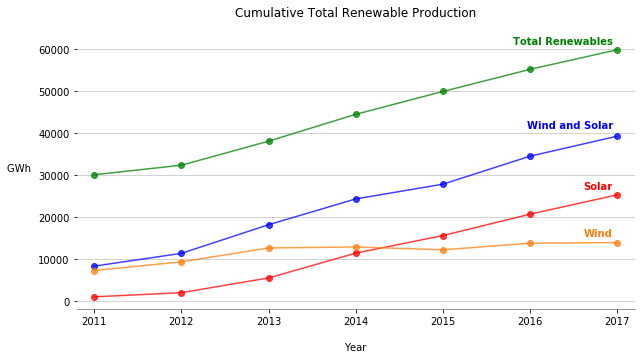

In [39]:
fig, ax = plt.subplots()

grouped = full_data.groupby('YEAR')
grouped_df = pd.DataFrame(grouped['RENEW TOTAL'].sum())
grouped_df.drop(index=[2010,2018],inplace=True)
grouped_df['RENEW TOTAL'] = grouped_df['RENEW TOTAL']/1000
grouped_df['WIND SOLAR'] = grouped['WIND SOLAR'].sum()
grouped_df['WIND SOLAR'] = grouped_df['WIND SOLAR']/1000
grouped_df['SOLAR TOTAL'] = grouped['SOLAR TOTAL'].sum()
grouped_df['SOLAR TOTAL'] = grouped_df['SOLAR TOTAL']/1000
grouped_df['WIND TOTAL'] = grouped['WIND TOTAL'].sum()
grouped_df['WIND TOTAL'] = grouped_df['WIND TOTAL']/1000

plt.plot(grouped_df.index,grouped_df['RENEW TOTAL'],color='g',marker='o',alpha=.75,label='Totoal Renewables')
plt.plot(grouped_df.index, grouped_df['WIND SOLAR'], color='b',marker='o',alpha=.75,label='Wind and Solar')
plt.plot(grouped_df.index, grouped_df['SOLAR TOTAL'], color='r',marker='o',alpha=.75,label='Solar')
plt.plot(grouped_df.index, grouped_df['WIND TOTAL'], color='C1',marker='o',alpha=.75,label='Wind')

fig.set_figheight(5)
fig.set_figwidth(10)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.set_axisbelow(True)
plt.grid(axis='y',alpha=.7)
plt.ylabel('GWh ',rotation='0',ha='right')
plt.xlim(2010.8,2017.2)
plt.xlabel('\nYear')
plt.title('Cumulative Total Renewable Production\n')

ax.annotate('Total Renewables',(2016.95,61000),ha='right',color='g',weight='bold',clip_on=True)
ax.annotate('Wind and Solar',(2016.95,41000),ha='right',color='b',weight='bold',clip_on=True)
ax.annotate('Solar',(2016.95,26500),ha='right',color='r',weight='bold',clip_on=True)
ax.annotate('Wind',(2016.95,15500),ha='right',color='C1',weight='bold',clip_on=True)

plt.savefig('Images/Montly_Yearly/Yearly_renewable_production_2010-2017.png', bbox_inches='tight')
plt.show()

### CAISO Demand Jan 2016 to Dec 2017

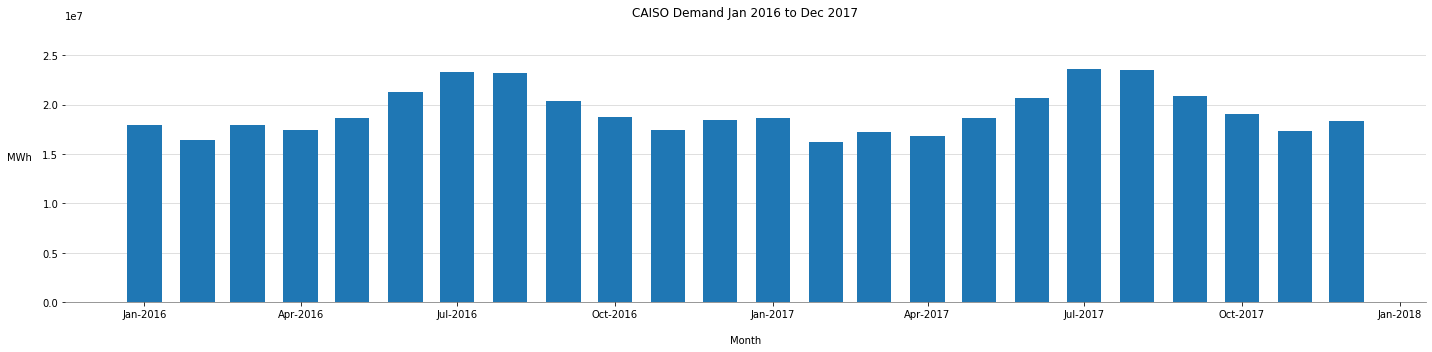

In [17]:
# Import monthly demand data, source: https://www.eia.gov/realtime_grid/#/summary/demand?end=20170301&start=20170201&regions=0
demand_data = pd.read_csv('CISO demand data 2016 2017.csv')

# Convert dates into more usable format and sort
demand_data=demand_data.rename(columns={'Month':'Date'})
pd.plotting.register_matplotlib_converters()
demand_data['Date'] = pd.to_datetime(demand_data['Date'])
demand_data.sort_values(by=['Date']).head()

# Split out month and year
demand_data['MONTH'] = demand_data['Date'].dt.month
demand_data['Year'] = demand_data['Date'].dt.year
demand_data.head()

# Test plot bar chart for total demand  
fig,ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(20) 
y_axis = demand_data['CISO demand megawatthours'] 
x_axis = demand_data['Date'] 
plt.bar(x_axis,y_axis,width=20,align='center') 
plt.ylim(0,max(y_axis)*1.2)  
plt.title("CAISO Demand Jan 2016 to Dec 2017")
plt.xlabel ("\nMonth")
plt.ylabel ("MWh  ",rotation='0',ha='right')
plt.tight_layout()

# Adjust for better data viz
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(.5)
plt.grid(axis='y',alpha=.5)
ax.set_axisbelow(True)
import matplotlib.dates as mdates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
plt.savefig('Images/Montly_Yearly/CAISO Demand Jan 2016 to Dec 2017.png', bbox_inches='tight')

### Proportion of Total Demand Provided by Renewables per Month in 2016

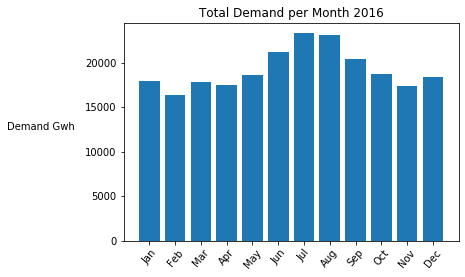

In [19]:
# Prepare data for demand vs renewables production by month 2016 table by conforming demand data
all_source_yr_mon_group=demand_data.groupby(['Year','MONTH'])
monthly_sum_demand = pd.DataFrame(all_source_yr_mon_group['CISO demand megawatthours'].sum())
monthly_sum_demand['Demand Gigawatthours'] = (monthly_sum_demand['CISO demand megawatthours'] / 1000)
data_16_demand = monthly_sum_demand.loc[2016].reset_index()
data_16_demand['MONTH'] = data_16_demand['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

# Plot total demand by in 2016
plt.bar(data_16_demand['MONTH'],data_16_demand['Demand Gigawatthours'])
plt.xticks(rotation=50)
plt.title('Total Demand per Month 2016')
plt.ylabel("Demand Gwh  ",rotation='0',ha='right')

plt.show()

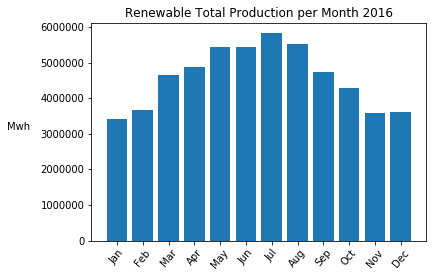

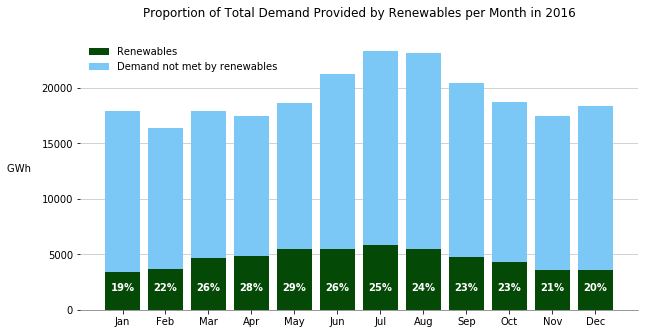

In [20]:
full_data = pd.read_csv('all_breakdown.csv')
full_data['SOLAR'] = full_data['SOLAR'].fillna(0)
full_data['SOLAR PV'] = full_data['SOLAR PV'].fillna(0)
full_data['SOLAR THERMAL'] = full_data['SOLAR THERMAL'].fillna(0)
full_data['SOLAR TOTAL'] = full_data['SOLAR']+full_data['SOLAR PV']+full_data['SOLAR THERMAL']
full_data['TIMESTAMP'] = pd.to_datetime(full_data['TIMESTAMP'])
full_data['MONTH'] = full_data['TIMESTAMP'].dt.month
full_data['YEAR'] = full_data['TIMESTAMP'].dt.year
full_data['DAY'] = full_data['TIMESTAMP'].dt.day
full_data['WIND SOLAR'] = full_data['SOLAR TOTAL'] + full_data['WIND TOTAL']
full_data['RENEW TOTAL'] = full_data['BIOGAS'] + full_data['BIOMASS']+ full_data['GEOTHERMAL']+full_data['GEOTHERMAL']+full_data['WIND SOLAR']
YearMonthGrouped = full_data.groupby(['YEAR','MONTH'])
monthly_sum = pd.DataFrame(YearMonthGrouped['RENEW TOTAL'].sum())
monthly_sum['Solar Total'] = YearMonthGrouped['SOLAR TOTAL'].sum()
monthly_sum['Wind Total'] = YearMonthGrouped['WIND TOTAL'].sum()
monthly_sum['Wind Solar Total'] = YearMonthGrouped['WIND SOLAR'].sum()
data_16 = monthly_sum.loc[2016].reset_index()
data_16['MONTH'] = data_16['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
plt.bar(data_16['MONTH'],data_16['RENEW TOTAL'])
plt.xticks(rotation=50)
plt.title('Renewable Total Production per Month 2016')
plt.ylabel("Mwh  ",rotation='0',ha='right')
plt.show()

# Prepare data for demand vs renewables production by month 2016 table by merging datasets
merged_df = pd.merge(data_16, data_16_demand, on="MONTH")

#Show renewables at Gigawatt scale
merged_df['Renew Gigawatthours'] = (merged_df['RENEW TOTAL'] / 1000)

# Get percent renewables
merged_df['Percent Renew'] = (merged_df['Renew Gigawatthours'] / merged_df['Demand Gigawatthours'] *100).map('{:.0f}%'.format)

# Plot demand vs renewables production by month 2016 chart
fig,ax = plt.subplots()
renew_16 = merged_df['Renew Gigawatthours']
fig.set_figheight(5)
fig.set_figwidth(10)
p1 = plt.bar(merged_df['MONTH'],renew_16,width=.8,color='xkcd:darkgreen',label='Renewables') 

# Show total demand less renewables produced
p2 = plt.bar(merged_df['MONTH'],(merged_df['Demand Gigawatthours']-renew_16),
             bottom=renew_16,width=.8,color='xkcd:lightblue',label='Demand not met by renewables') 

# Label bars with % renewable concentration
bar_label = merged_df['Percent Renew']
def autolabel(rects):
    for idx,rect in enumerate(p1):
        height = 1500
        ax.text(rect.get_x() + rect.get_width()/2., height, (bar_label[idx]),ha='center',va='bottom',color='w',weight='bold')
autolabel (p1)

# Plot design
plt.title('Proportion of Total Demand Provided by Renewables per Month in 2016\n')
plt.ylabel("GWh  ",rotation='0',ha='right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(.5)
plt.grid(axis='y',alpha=.7)
ax.set_axisbelow(True) 
plt.legend(frameon=False)
plt.savefig('Images/Montly_Yearly/Proportion of Total Demand Provided by Renewables per Month in 2016.png',bbox_inches='tight')
plt.show()

### Proportion of Total Demand Provided by Renewables per Month in 2017

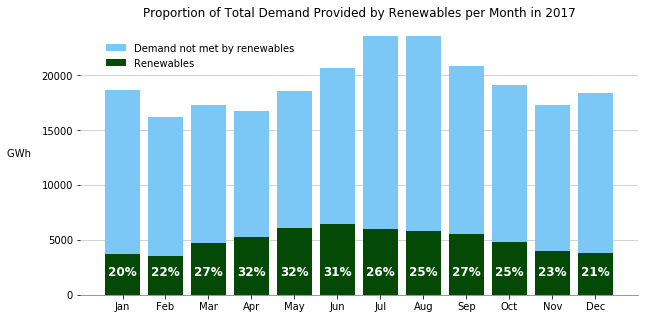

In [21]:
# Prepare to plot demand vs renewables production by month 2017 chart

# Prepare renewables df
data_17 = monthly_sum.loc[2017].reset_index()
data_17['MONTH'] = data_17['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

# Prepare demand df
data_17_demand = monthly_sum_demand.loc[2017].reset_index()
data_17_demand['MONTH'] = data_17_demand['MONTH'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

# Merge 2017 datasets
merged_df_17 = pd.merge(data_17, data_17_demand, on="MONTH")

#Show renewables at Gigawatt scale
merged_df_17['Renew Gigawatthours'] = merged_df_17['RENEW TOTAL'] / 1000

# Include percent renewables
merged_df_17['Percent Renew'] = (merged_df_17['Renew Gigawatthours'] / 
                                 merged_df_17['Demand Gigawatthours'] *100).map('{:.0f}%'.format)

# Plot demand vs renewables production by month 2017 chart
fig,ax = plt.subplots()
renew_17 = merged_df_17['Renew Gigawatthours']
fig.set_figheight(5) 
fig.set_figwidth(10)

# Plot renewables
p1 = plt.bar(merged_df_17['MONTH'],renew_17,width=.8,color='xkcd:darkgreen',label='Renewables') 

# Plot total demand less renewables 
p2 = plt.bar(merged_df_17['MONTH'],(merged_df_17['Demand Gigawatthours']-renew_17),
             bottom=renew_17,width=.8,color='xkcd:lightblue',label='Demand not met by renewables') 
    #color consistent with other charts for total demand

# Label bars with % renewable 
bar_label = merged_df_17['Percent Renew']
def autolabel(rects):
    for idx,rect in enumerate(p1):
        height = 1500
        ax.text(rect.get_x() + rect.get_width()/2., height, (bar_label[idx]),
                ha='center',va='bottom',color='w',weight='bold',fontsize='12')
autolabel (p1)

# Chart design
plt.title('Proportion of Total Demand Provided by Renewables per Month in 2017')
plt.ylabel("GWh  ",rotation='0',ha='right')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(.5)
plt.grid(axis='y',alpha=.7)
ax.set_axisbelow(True) 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],frameon=False,bbox_to_anchor=(.4,.8))
# ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(1,.2), borderaxespad=0,frameon=False) # ax.legend(prop=dict(size=18))
plt.savefig('Images/Montly_Yearly/Proportion of Total Demand Provided by Renewables per Month in 2017',bbox_inches='tight')
plt.show()

### 2017 Peak Load Day Demand vs Renewable Production

In [22]:
# Pull 2017 peak load data - source: http://www.caiso.com/Documents/CaliforniaISOPeakLoadHistory.pdf
peak_data = pd.read_csv('CISO demand data 9.1.17 peak load.csv')

# Prepare data for merge
peak_data=peak_data.rename(columns={'Category':'Date'})
pd.plotting.register_matplotlib_converters()
peak_data['TIMESTAMP'] = pd.to_datetime(peak_data['Date'])
peak_data.sort_values(by=['TIMESTAMP']).head()
peak_data['Hour'] = peak_data['TIMESTAMP'].dt.hour+1
peak_data = peak_data.astype({"Hour": float})

# Merge data
merged_peak = pd.merge(peak_data, full_data, on="TIMESTAMP")
merged_peak.head(2)

C:\Users\graha\Anaconda3\lib\site-packages\dateutil\parser\_parser.py:1206: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


Date  CISO demand megawatthours  \
0  09/1/2017 23H PDT                      39648   
1  09/1/2017 22H PDT                      43346   

   CISO demand forecast megawatthours           TIMESTAMP  Hour_x  BIOGAS  \
0                               39266 2017-09-01 23:00:00    24.0   164.0   
1                               42947 2017-09-01 22:00:00    23.0   164.0   

   BIOMASS  GEOTHERMAL  Hour_y  SMALL HYDRO  SOLAR  SOLAR PV  SOLAR THERMAL  \
0    357.0      1173.0    24.0        370.0    0.0       0.0            0.0   
1    370.0      1173.0    23.0        399.0    0.0       0.0            0.0   

   WIND TOTAL  SOLAR TOTAL  MONTH  YEAR  DAY  WIND SOLAR  RENEW TOTAL  
0       526.0          0.0      9  2017    1       526.0       3393.0  
1       516.0          0.0      9  2017    1       516.0       3396.0

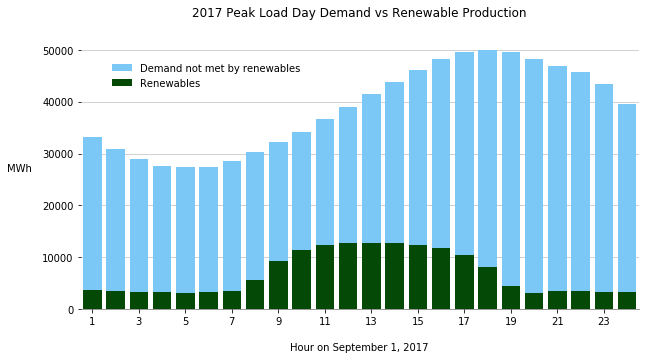

In [23]:
# Plot demand vs renewables production by month 2017 chart
fig,ax = plt.subplots()
peak_day = merged_peak['RENEW TOTAL']
fig.set_figheight(5)
fig.set_figwidth(10)

# Plot renwables
p1 = plt.bar(merged_peak['Hour_x'],peak_day,width=.8,color='xkcd:darkgreen',label='Renewables') 

# Plot total demand less renewables produced
p2 = plt.bar(merged_peak['Hour_x'],(merged_peak['CISO demand megawatthours']-peak_day),
             bottom=peak_day,width=.8,color='xkcd:lightblue',label='Demand not met by renewables') 

# Chart design
plt.title('2017 Peak Load Day Demand vs Renewable Production\n')
plt.ylabel("MWh  ",rotation='0',ha='right')
plt.xlabel('\nHour on September 1, 2017')
plt.xlim(min(merged_peak['Hour_x']-.5),max(merged_peak['Hour_x'])+.5)
plt.xticks(np.arange(min(merged_peak['Hour_x']),max(merged_peak['Hour_x']),2))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_alpha(.5)
plt.grid(axis='y',alpha=.7)
ax.set_axisbelow(True) 
handles, labels = ax.get_legend_handles_labels()
color_list=['xkcd:lightblue','xkcd:darkgreen']
ax.legend(handles[::-1], labels[::-1],bbox_to_anchor=(.4,.92), borderaxespad=0,frameon=False) # ax.legend(prop=dict(size=18))
plt.savefig('Images/Montly_Yearly/2017 Peak Load Day Demand vs Renewable Production',bbox_inches='tight')
plt.show()

<Figure size 1008x288 with 0 Axes>

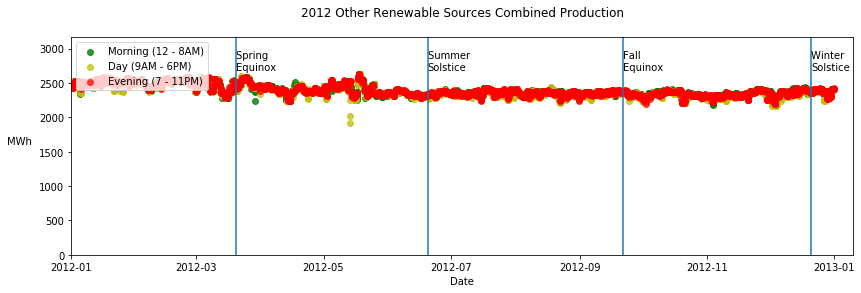

<Figure size 1008x288 with 0 Axes>

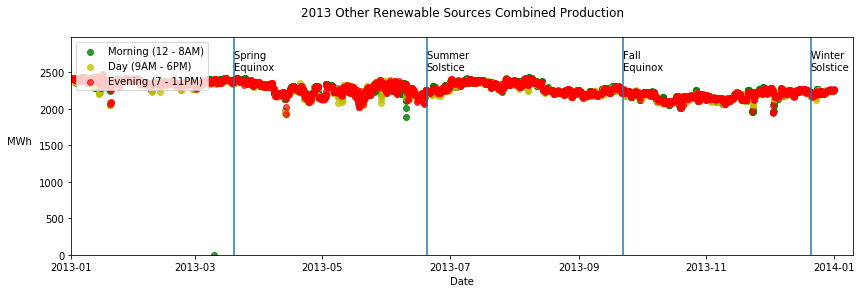

<Figure size 1008x288 with 0 Axes>

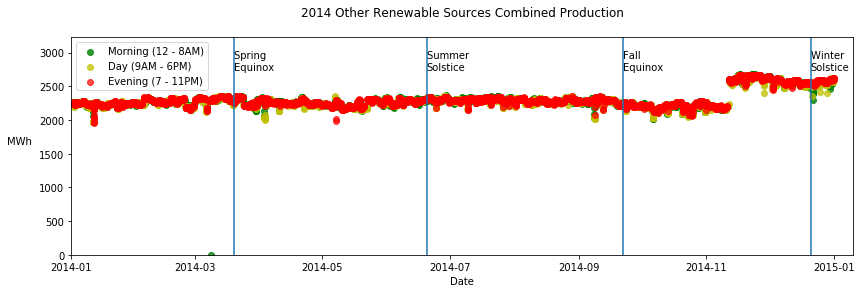

<Figure size 1008x288 with 0 Axes>

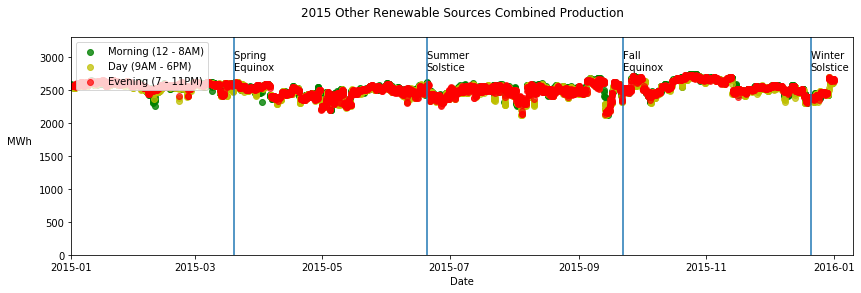

<Figure size 1008x288 with 0 Axes>

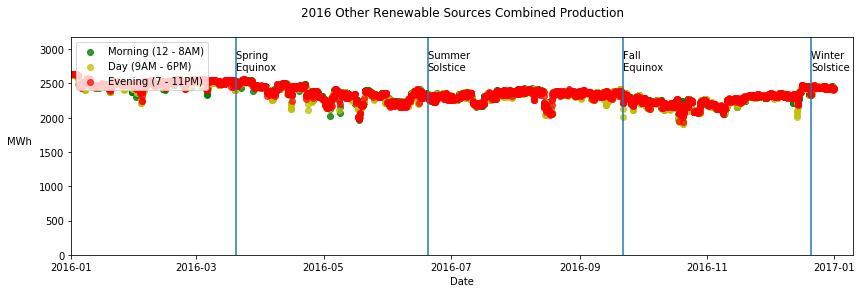

<Figure size 1008x288 with 0 Axes>

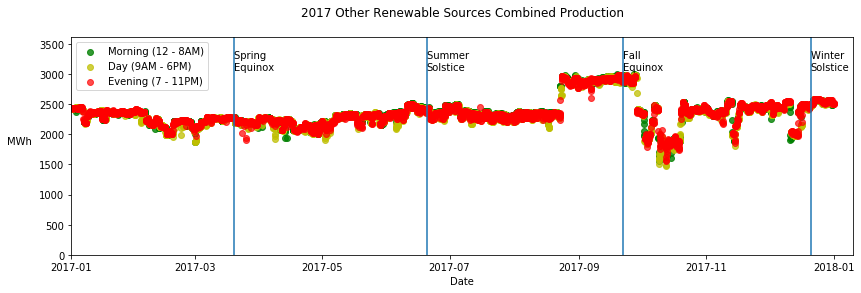

In [65]:
for year in range(2012,2018):
    data = full_data.loc[full_data['YEAR']==year,:]
    hour = data.loc[:,'Hour'].values
    mask_morning = ((hour < 9))
    mask_day = ((hour >= 9)&(hour <= 16))
    mask_evening = ((hour >16))
    mask_mid = ((hour >10)&(hour<16))
    masks = [mask_morning, mask_mid, mask_evening]
    plt.figure(figsize=(14,4))
    x = data['TIMESTAMP']
    y = data['COMBINED SMALLER SOURCES']
    plt.figure(figsize=(14,4))
    plt.scatter(x[mask_morning], y[mask_morning],c='g',alpha=.8,label='Morning (12 - 8AM)')
    plt.scatter(x[mask_day], y[mask_day],c='y',alpha=.75,label='Day (9AM - 6PM)')
    plt.scatter(x[mask_evening], y[mask_evening],c='r',alpha=.7,label='Evening (7 - 11PM)')
    plt.xlim(pd.to_datetime('01/01/{}'.format(year)),pd.to_datetime('01/10/{}'.format(year+1)))
    plt.ylim(0,y.max()*1.2)
    plt.ylabel('MWh ',rotation='0',ha='right')
    plt.xlabel('Date')
    plt.title('{} Other Renewable Sources Combined Production\n'.format(year))
    plt.legend(loc='upper left')
    seasons = [(pd.to_datetime('June 20, {}'.format(year)), 'Summer \nSolstice'),
           (pd.to_datetime('December 21, {}'.format(year)), 'Winter \nSolstice'),
           (pd.to_datetime('September 22, {}'.format(year)), 'Fall \nEquinox'),
           (pd.to_datetime('March 20, {}'.format(year)), 'Spring \nEquinox')]
    for date,season in seasons:
        plt.axvline(date)
        plt.text(date,y.max()*1.02,season)
    if year in [2012,2017]:
        plt.savefig('Images/Seasons/{}_other_sources_production_seasons.png'.format(year))
    plt.show()

In [19]:
county_data = pd.read_csv(r"C:\Users\graha\Desktop\ElectricityByCounty.csv")
county_data.head()

County Sector          2018          2017          2016          2015  \
0    ALAMEDA  Total  10343.892364  11106.369400  10814.694495  10257.332710   
1     ALPINE  Total     18.677135     18.976912     17.415654     16.209900   
2     AMADOR  Total    299.154772    313.520037    309.635323    285.623785   
3      BUTTE  Total   1474.660297   1534.492656   1486.524542   1496.990082   
4  CALAVERAS  Total    333.097984    347.728906    315.900716    311.087202   

           2014          2013          2012          2011   Total Usage  
0  10318.357038  10634.931009  10602.778217  10990.092975  85068.448208  
1     15.983364     18.176468     13.888339     14.293288    133.621060  
2    289.598598    310.384025    321.817592    310.221184   2439.955316  
3   1491.908668   1504.429510   1508.130470   1439.721545  11936.857770  
4    318.903628    325.877542    325.739716    325.086665   2603.422359

In [62]:
years = {}
for year in county_data.drop(columns=['County','Sector','Total Usage','2018']).columns:
    years[year] = (county_data.loc[:,year].sum()*.816)

    
years 
years.keys()
years.values()
years = pd.DataFrame({
    'Years':[*years.keys()],
    'Total Useage':[*years.values()]
})
years['YEAR'] = years['Years'].astype(int)
years.drop(columns=['Years'],inplace=True)


Total Useage  YEAR
0  235523.665391  2017
1  231765.954607  2016
2  231032.127020  2015
3  231422.522248  2014
4  229336.965819  2013
5  230853.251902  2012
6  226376.422297  2011

YEAR   RENEW TOTAL   Total Useage Percent By Renew
0  2011  30050.803000  226376.422297              13%
1  2012  32308.246936  230853.251902              14%
2  2013  38021.107000  229336.965819              17%
3  2014  44406.363000  231422.522248              19%
4  2015  49836.654000  231032.127020              22%
5  2016  55097.629000  231765.954607              24%
6  2017  59751.971000  235523.665391              25%

['13%', '14%', '17%', '19%', '22%', '24%', '25%'] [2011, 2012, 2013, 2014, 2015, 2016, 2017] [30050, 32308, 38021, 44406, 49836, 55097, 59751]


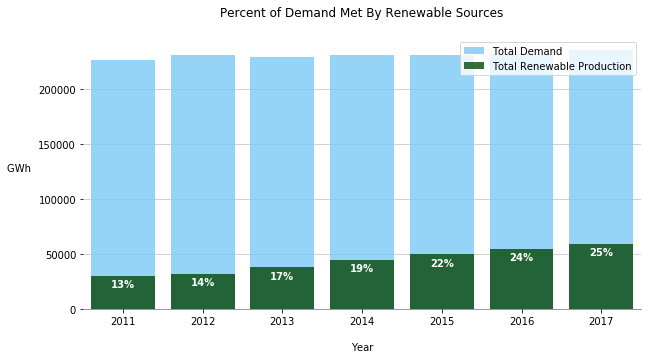

In [114]:
 




fig, ax = plt.subplots()

grouped = full_data.groupby('YEAR')
grouped_df = pd.DataFrame(grouped['RENEW TOTAL'].sum())
grouped_df.drop(index=[2010,2018],inplace=True)
grouped_df['RENEW TOTAL'] = grouped_df['RENEW TOTAL']/1000

combined = grouped_df.reset_index().merge(years, on='YEAR')
combined['Percent By Renew'] = (combined['RENEW TOTAL']/combined['Total Useage'])*100
combined['Percent By Renew'] = combined['Percent By Renew'].map('{:.0f}%'.format)
display(combined)

plt.bar(years['YEAR'],years['Total Useage'],color='xkcd:lightblue',alpha=.8,label='Total Demand')

plt.bar(grouped_df.index,grouped_df['RENEW TOTAL'],color='xkcd:darkgreen',alpha=.8,label='Total Renewable Production')

fig.set_figheight(5)
fig.set_figwidth(10)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_alpha(0.5)
ax.set_axisbelow(True)
plt.grid(axis='y',alpha=.7)
plt.ylabel('GWh ',rotation='0',ha='right')
#plt.ylim(30000,280000)
plt.xlim(2010.5,2017.5)
plt.xlabel('\nYear')
plt.title('Percent of Demand Met By Renewable Sources\n')
plt.legend()


percent = list(combined['Percent By Renew'].astype(str))
x = list(combined['YEAR'].astype(int))
y= list(combined['RENEW TOTAL'].astype(int))

print(percent,x,y)

for i, txt in enumerate(percent):
    ax.annotate(txt,( x[i],y[i]-3000),ha='center',va='top',fontweight='bold',color='w')
plt.savefig('Images/Montly_Yearly/Yearly_percent_of_total_year_demand.png', bbox_inches='tight')
plt.show()